In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression
import category_encoders as ce

In [62]:
dataset=pd.read_csv("Housing.csv")
dataset.head(3)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished


In [63]:
dataset.shape

(545, 13)

In [64]:
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [65]:
dataset.duplicated().sum()

np.int64(0)

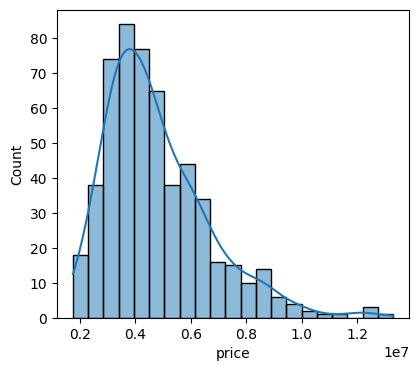

In [66]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
sns.histplot(dataset['price'], kde=True)
plt.show()

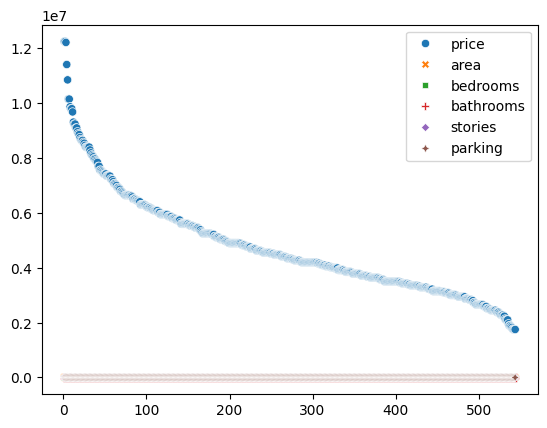

In [67]:
sns.scatterplot(dataset.iloc[1:,:])
plt.show()

In [68]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [69]:
dataset.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [70]:
dataset.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [71]:
x = dataset.drop("price", axis=1)
y = dataset["price"]

In [72]:
categorical_features=["mainroad","guestroom","basement","hotwaterheating","airconditioning","prefarea","furnishingstatus"]
numerical_features=[col for col in x.columns if col not in categorical_features]

In [73]:
numeric_transformer = Pipeline(steps=[
    ("scaler", StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ("target", ce.TargetEncoder())
])

# Column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features)
    ]
)

In [74]:
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", RandomForestRegressor(n_estimators=200,random_state=42))
])

In [75]:
model2 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

In [76]:
model3 = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", GradientBoostingRegressor(n_estimators=200, random_state=42))
])

In [77]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
#y_train_log, y_test_log = np.log1p(y_train), np.log1p(y_test)

In [78]:
y_train_log=np.log1p(y_train)
model.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor',
                 RandomForestRegressor(n_estimators=200, random_state=42))])

In [79]:
model2.fit(x_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor', LinearRegression())])

In [81]:
model3.fit(x_test,y_test)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['area', 'bedrooms',
                                                   'bathrooms', 'stories',
                                                   'parking']),
                                                 ('cat',
                                                  Pipeline(steps=[('target',
                                                                   TargetEncoder())]),
                                                  ['mainroad', 'guestroom',
                                                   'basement',
                                                   'hotwaterheating',
                                                   'airconditioning',
                                                   'prefarea',
                                                   'furnishingstatus'])])),
                ('regressor',
                 GradientBoostingRegressor(n_estimators=200, random_state=42))])

In [82]:
y_pred_rf= model.predict(x_test)

In [83]:
y_pred_lr = model2.predict(x_test)
#y_pred_lr = np.expm1(y_pred_log_lr)

In [84]:
y_pred_gb = model3.predict(x_test)
#y_pred_gb = np.expm1(y_pred_log_gb)

In [85]:
from sklearn.metrics import r2_score

r2_rf = r2_score(y_test,y_pred)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print(r2_rf)

scores = cross_val_score(model, x, np.log1p(y), cv=5, scoring="r2")

print("Cross-Validation R² Scores:", np.round(scores, 4))
print("Average R²:", round(scores.mean(), 4))

0.5983736827706285
Cross-Validation R² Scores: [ -5.5321  -8.5526 -16.817  -13.4767  -5.3147]
Average R²: -9.9386


In [99]:
r2_lr = r2_score(y_test,y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
print(r2_lr)

0.5493130453022766


In [100]:
r2_gb = r2_score(y_test,y_pred_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_pred_gb))
print(r2_gb)

0.9823712495208679


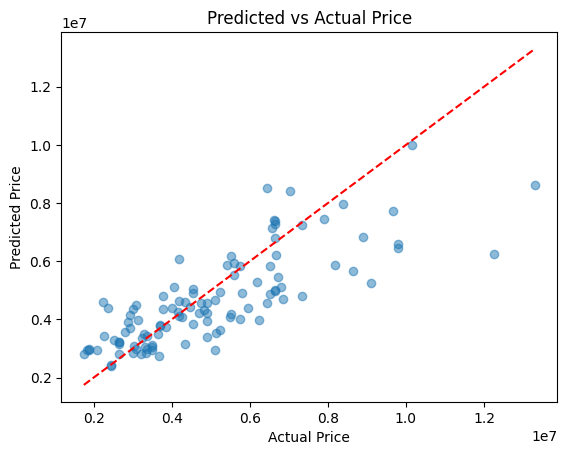

In [101]:

plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Predicted vs Actual Price")
plt.show()


In [102]:
# Create comparison DataFrame
model_comparison = pd.DataFrame({
    'Model': ['Random Forest', 'Linear Regression', 'Gradient Boosting'],
    'R² Score': [r2_rf, r2_lr, r2_gb],
    'RMSE': [rmse_rf, rmse_lr, rmse_gb]
}).sort_values(by='R² Score', ascending=False)

print("\nModel Performance Comparison:\n")
print(model_comparison)


Model Performance Comparison:

               Model  R² Score          RMSE
2  Gradient Boosting  0.982371  2.985059e+05
0      Random Forest  0.598374  1.469943e+06
1  Linear Regression  0.549313  1.509314e+06


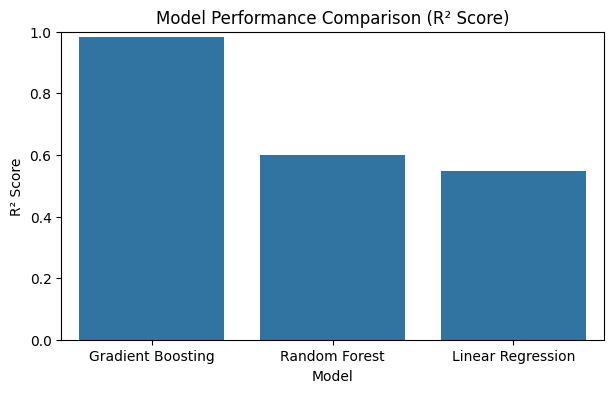

In [103]:
plt.figure(figsize=(7,4))
sns.barplot(data=model_comparison, x='Model', y='R² Score')
plt.title("Model Performance Comparison (R² Score)")
plt.ylim(0, 1)
plt.show()

In [107]:
sample = pd.DataFrame([{
    'area':8960	,
 'bedrooms':4,
 'bathrooms':4,
 'stories':4,
 'mainroad':'yes',
 'guestroom':'no',
 'basement':'no',
 'hotwaterheating':'no',
 'airconditioning':'yes',
 'parking':3,
 'prefarea':'no',
 'furnishingstatus':'furnished'
}])
model3.predict(sample)

array([7369374.46640947])